# EDA

## 0. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv('data.csv', encoding='CP949')

In [4]:
data.head()

date sex  age big_cat sm_cat  qty       cnt
0  20180101   F   20      식품    가공란   37  0.480964
1  20180101   F   30      식품    가공란   16  0.480964
2  20180101   F   40      식품    가공란    9  0.480964
3  20180101   F   50      식품    가공란    3  0.480964
4  20180101   M   20      식품    가공란   13  0.480964

**변수명**  
* qty: 온라인구매내역  
* cnt: 소셜데이터

## 1. 데이터 전처리

In [5]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

In [6]:
def weekend(data):
    if data in ['Saturday','Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

In [7]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['weekday'] = data['date'].dt.strftime("%A")
data['weekend'] = data['weekday'].apply(weekend)

In [8]:
data.head()

date sex  age big_cat sm_cat  qty       cnt  year  month  day weekday  \
0 2018-01-01   F   20      식품    가공란   37  0.480964  2018      1    1  Monday   
1 2018-01-01   F   30      식품    가공란   16  0.480964  2018      1    1  Monday   
2 2018-01-01   F   40      식품    가공란    9  0.480964  2018      1    1  Monday   
3 2018-01-01   F   50      식품    가공란    3  0.480964  2018      1    1  Monday   
4 2018-01-01   M   20      식품    가공란   13  0.480964  2018      1    1  Monday   

   weekend  
0  Weekday  
1  Weekday  
2  Weekday  
3  Weekday  
4  Weekday

## 2. EDA

### 2-1. 대분류, 소분류

<ipython-input-9-a7b4fe0986c2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['big_cat'])['qty','cnt'].mean().plot(kind = 'bar')


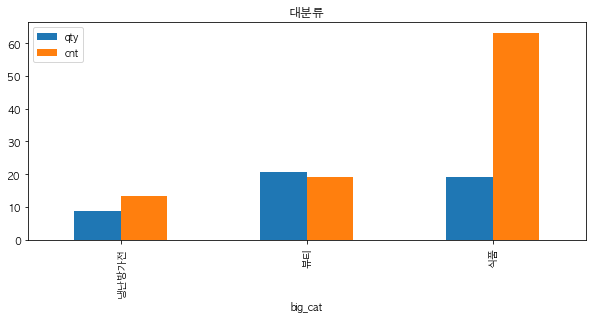

In [9]:
plt.rcParams["figure.figsize"] = (10,4)
data.groupby(['big_cat'])['qty','cnt'].mean().plot(kind = 'bar')
plt.title('대분류')
plt.show()

* 냉난방가전: 구매건수 < 키워드 관련 문서수 -> 비싸기 때문
* 뷰티: 구매건수 > 키워드 관련 문서수 -> 후기나 홍보글보다는 생필품이기 때문에 구매자가 더 많은듯
* 식품: 구매건수 < 키워드 관련 문서수 -> 맛집 후기, 레시피

<ipython-input-10-08969d802739>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['big_cat']=='냉난방가전'].groupby(['sm_cat'])['qty','cnt'].mean().plot(kind = 'bar')


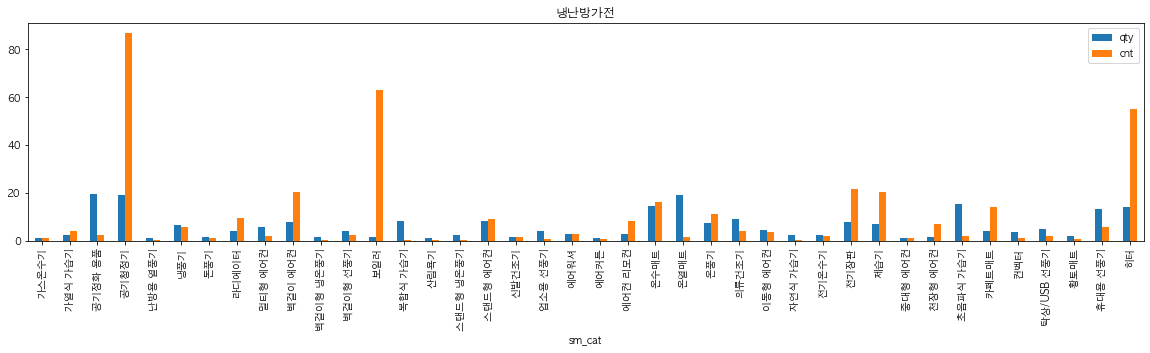

In [10]:
plt.rcParams["figure.figsize"] = (20,4)
data[data['big_cat']=='냉난방가전'].groupby(['sm_cat'])['qty','cnt'].mean().plot(kind = 'bar')
plt.title('냉난방가전')
plt.show()

* 공기청정기, 보일러, 히터: 구매건수 < 키워드 관련 문서수 -> 제품에 대한 홍보가 많은듯

<ipython-input-11-7f68afe9c907>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['big_cat']=='뷰티'].groupby(['sm_cat'])['qty','cnt'].mean().plot(kind = 'bar')


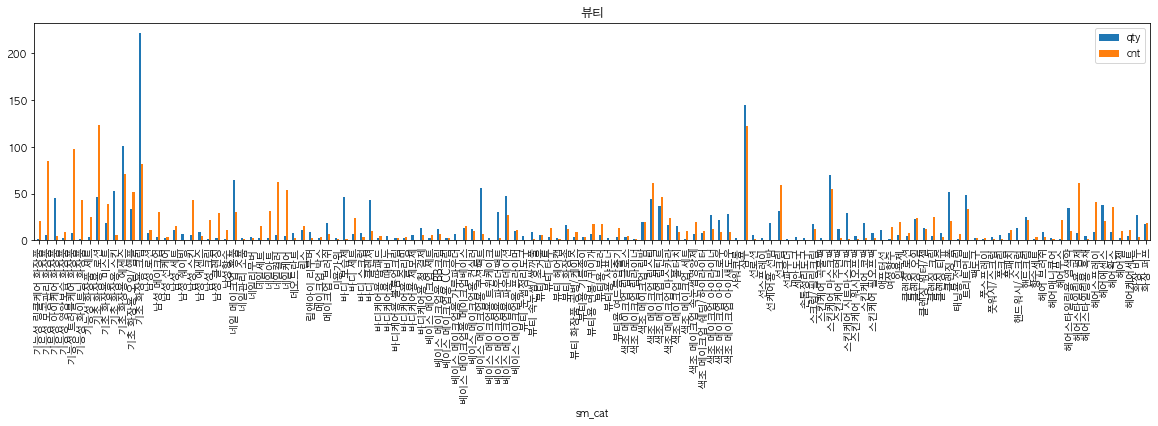

In [11]:
plt.rcParams["figure.figsize"] = (20,4)
data[data['big_cat']=='뷰티'].groupby(['sm_cat'])['qty','cnt'].mean().plot(kind = 'bar')
plt.title('뷰티')
plt.show()

* 기초 화장품 크림: 구매건수 > 키워드 관련 문서수 -> 생필품이다보니 구매건수가 훨씬 많은듯
* 기초 화장품 로션: 구매건수 < 키워드 관련 문서수 -> 크림과 비슷한 생필품일거라 생각했는데 로션보다는 크림을 사용하나봄

<ipython-input-12-046af685ac9b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['big_cat']=='식품'].groupby(['sm_cat'])['qty','cnt'].mean().plot(kind = 'bar')


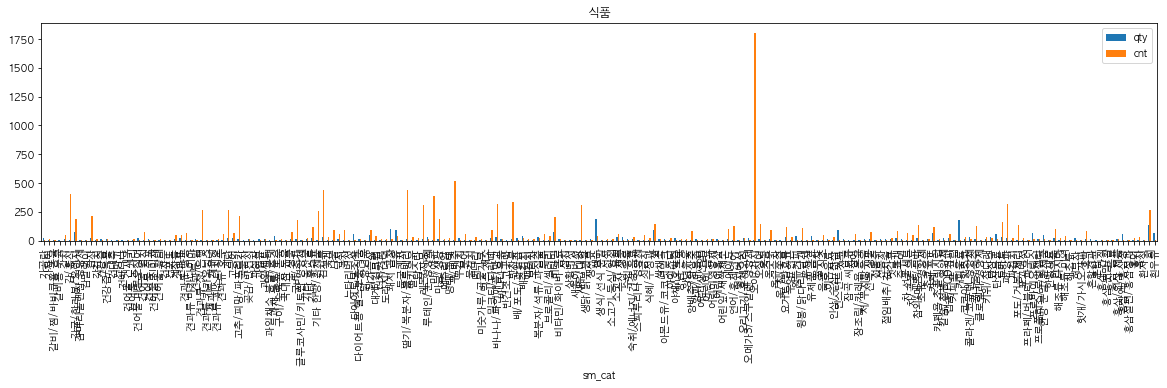

In [12]:
plt.rcParams["figure.figsize"] = (20,4)
data[data['big_cat']=='식품'].groupby(['sm_cat'])['qty','cnt'].mean().plot(kind = 'bar')
plt.title('식품')
plt.show()

In [13]:
data[data['big_cat']=='식품'].groupby(['sm_cat'])['qty','cnt'].mean().sort_values(by = 'cnt', ascending = False)

<ipython-input-13-a98fb9e26240>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['big_cat']=='식품'].groupby(['sm_cat'])['qty','cnt'].mean().sort_values(by = 'cnt', ascending = False)


qty          cnt
sm_cat                             
오이/가지         6.949771  1798.918500
무/배추          2.727363   517.171818
딸기/복분자/블루베리  10.452282   437.369611
김치류          34.821551   435.822851
감/홍시          4.428715   403.520992
...                ...          ...
혼합견과         11.416642     0.043635
과실차           7.159683     0.027853
잡곡 씨드류        2.927093     0.026463
건바나나          3.229584     0.014936
갈비용 우육        2.271512     0.012805

[212 rows x 2 columns]

* 오이/가지: 관련 문서수가 가장 많음

In [95]:
data[data['big_cat']=='식품'].groupby(['sm_cat'])['qty','cnt'].mean().sort_values(by = 'qty', ascending = False)

<ipython-input-95-d4133ee57c71>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['big_cat']=='식품'].groupby(['sm_cat'])['qty','cnt'].mean().sort_values(by = 'qty', ascending = False)


qty         cnt
sm_cat                            
생수          183.647123   40.874600
커피음료        174.926368    1.677730
회           132.628477  262.842689
돼지 곱창        97.954015    9.809990
쌀            95.929168  145.863481
...                ...         ...
건어물 건새우       1.377638    2.301392
커피용 프림        1.300670    0.953366
영지버섯          1.167969    1.607552
마/야콘          1.163070  389.274360
과일채소 분말/분태    1.075658    0.086526

[212 rows x 2 columns]

* 생수, 커피음료, 회: 온라인 구매 건수 많음

<ipython-input-14-4839a2735dd0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['sm_cat']!='오이/가지'][data['big_cat']=='식품'].groupby(['sm_cat'])['qty','cnt'].mean().plot(kind = 'bar')
<ipython-input-14-4839a2735dd0>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['sm_cat']!='오이/가지'][data['big_cat']=='식품'].groupby(['sm_cat'])['qty','cnt'].mean().plot(kind = 'bar')


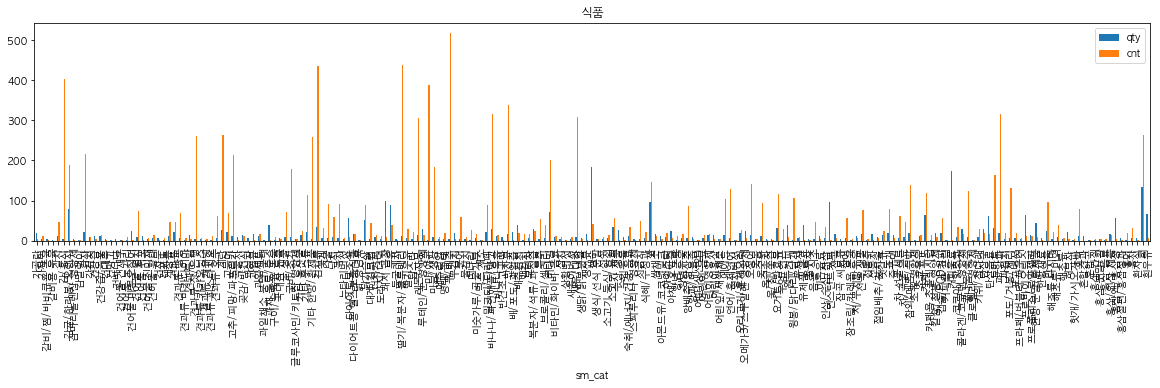

In [14]:
plt.rcParams["figure.figsize"] = (20,4)
data[data['sm_cat']!='오이/가지'][data['big_cat']=='식품'].groupby(['sm_cat'])['qty','cnt'].mean().plot(kind = 'bar')
plt.title('식품')
plt.show()

* 식품: 구매건수 << 키워드 관련 문서수 -> 레시피에 많이 포함

### 2-2. 월별, 년도+월별

In [15]:
data['yymm'] = data['year'].map(str) + data['month'].apply(lambda x: str(x) if x >= 10 else '0'+str(x))

<ipython-input-18-367bec22b23e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['big_cat']=='냉난방가전'].groupby(['month','big_cat'])['qty','cnt'].mean().plot(kind = 'line')


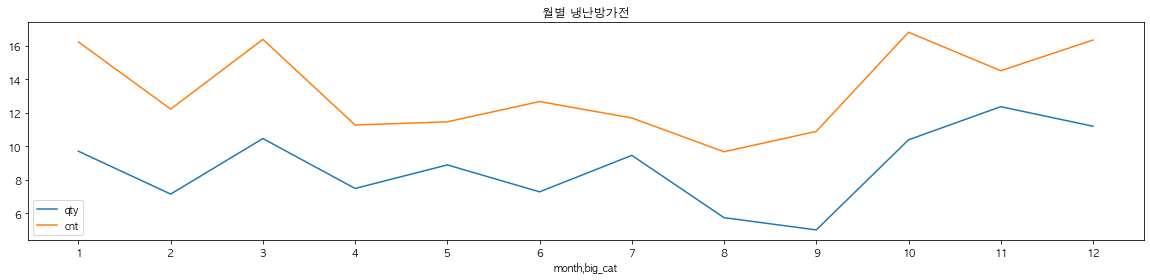

In [18]:
plt.rcParams["figure.figsize"] = (20,4)
data[data['big_cat']=='냉난방가전'].groupby(['month','big_cat'])['qty','cnt'].mean().plot(kind = 'line')
plt.xticks(np.arange(0,12), labels=np.arange(1,13))
plt.title('월별 냉난방가전')
plt.show()

* 월별로 비슷한 양상

<ipython-input-19-59f3812bee8b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['big_cat']=='냉난방가전'].groupby(['yymm','big_cat'])['qty','cnt'].mean().plot(kind = 'line')


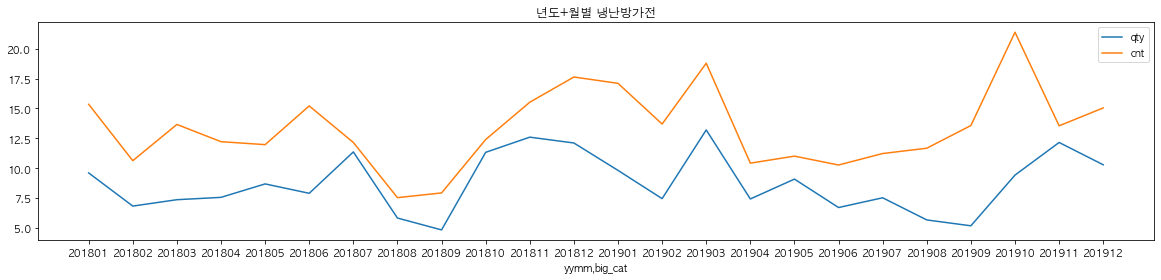

In [19]:
plt.rcParams["figure.figsize"] = (20,4)
data[data['big_cat']=='냉난방가전'].groupby(['yymm','big_cat'])['qty','cnt'].mean().plot(kind = 'line')
plt.xticks(np.arange(0,24), labels=['201801','201802','201803','201804','201805','201806','201807','201808','201809','201810','201811','201812',
                                    '201901','201902','201903','201904','201905','201906','201907','201908','201909','201910','201911','201912'])
plt.title('년도+월별 냉난방가전')
plt.show()

<ipython-input-51-2d896bbb0dec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_diff = data[data['big_cat']=='냉난방가전'].groupby(['year','month','big_cat'])['qty','cnt'].mean().reset_index()


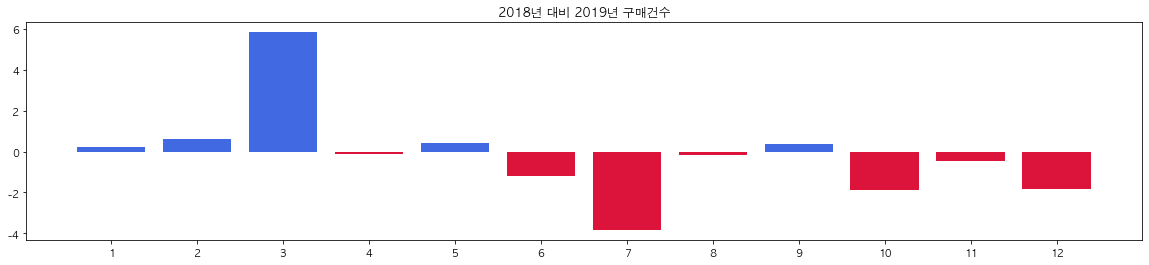

In [51]:
df_diff = data[data['big_cat']=='냉난방가전'].groupby(['year','month','big_cat'])['qty','cnt'].mean().reset_index()
lst_2019 = df_diff[df_diff['year']==2019]['qty'].tolist()
lst_2018 = df_diff[df_diff['year']==2018]['qty'].tolist()
plt.bar(range(1,13),[lst_2019[i]-lst_2018[i] for i in range(len(lst_2019))], 
        color = ["royalblue" if i>0 else "crimson" for i in [lst_2019[i]-lst_2018[i] for i in range(len(lst_2019))]])
plt.xticks(np.arange(1,13))
plt.title('2018년 대비 2019년 구매건수')
plt.show()

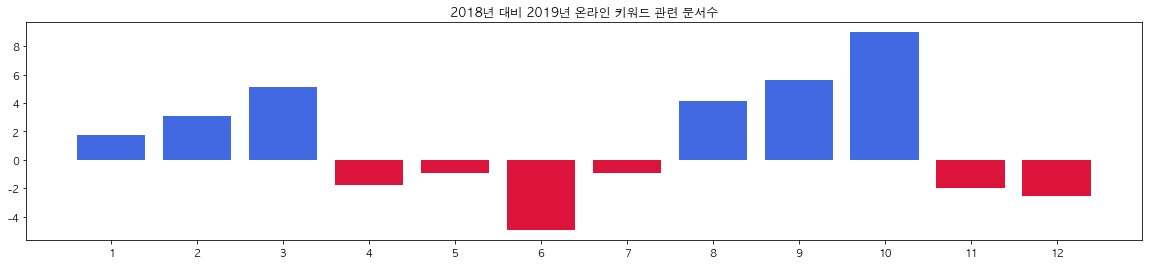

In [53]:
lst_2019 = df_diff[df_diff['year']==2019]['cnt'].tolist()
lst_2018 = df_diff[df_diff['year']==2018]['cnt'].tolist()
plt.bar(range(1,13),[lst_2019[i]-lst_2018[i] for i in range(len(lst_2019))], 
        color = ["royalblue" if i>0 else "crimson" for i in [lst_2019[i]-lst_2018[i] for i in range(len(lst_2019))]])
plt.xticks(np.arange(1,13))
plt.title('2018년 대비 2019년 온라인 키워드 관련 문서수')
plt.show()

<ipython-input-54-c5c3652f82a5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['big_cat']=='뷰티'].groupby(['month','big_cat'])['qty','cnt'].mean().plot(kind = 'line')


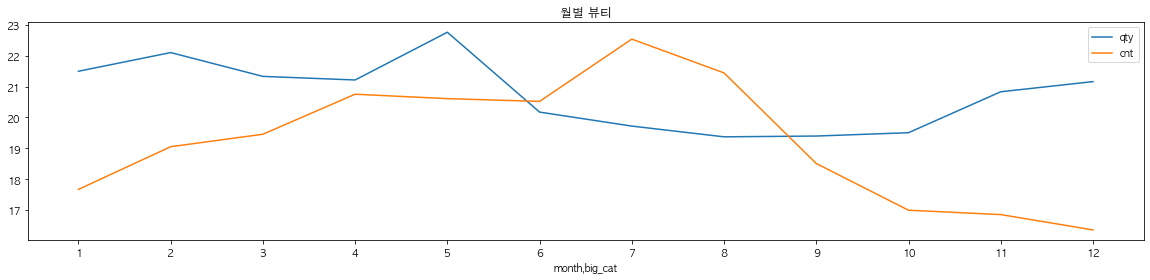

In [54]:
plt.rcParams["figure.figsize"] = (20,4)
data[data['big_cat']=='뷰티'].groupby(['month','big_cat'])['qty','cnt'].mean().plot(kind = 'line')
plt.xticks(np.arange(0,12), labels=np.arange(1,13))
plt.title('월별 뷰티')
plt.show()

<ipython-input-56-a5d44d21815c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['big_cat']=='뷰티'].groupby(['yymm','big_cat'])['qty','cnt'].mean().plot(kind = 'line')


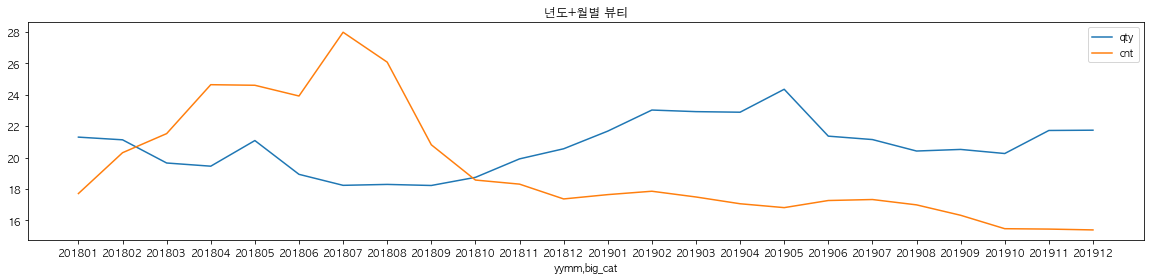

In [56]:
plt.rcParams["figure.figsize"] = (20,4)
data[data['big_cat']=='뷰티'].groupby(['yymm','big_cat'])['qty','cnt'].mean().plot(kind = 'line')
plt.xticks(np.arange(0,24), labels=['201801','201802','201803','201804','201805','201806','201807','201808','201809','201810','201811','201812',
                                    '201901','201902','201903','201904','201905','201906','201907','201908','201909','201910','201911','201912'])
plt.title('년도+월별 뷰티')
plt.show()

<ipython-input-57-c4519a2ce720>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_diff = data[data['big_cat']=='뷰티'].groupby(['year','month','big_cat'])['qty','cnt'].mean().reset_index()


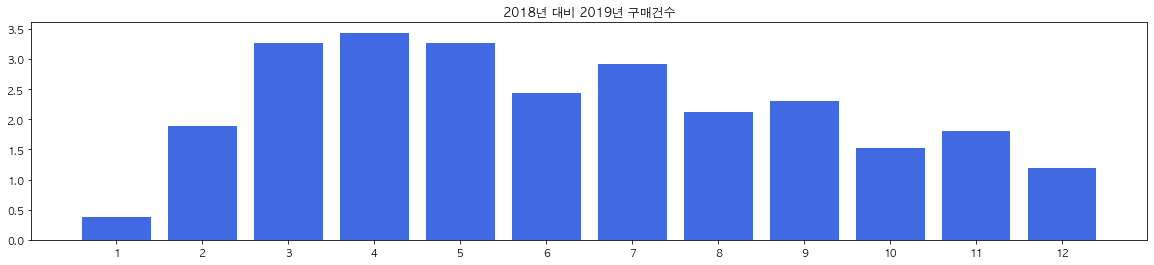

In [57]:
df_diff = data[data['big_cat']=='뷰티'].groupby(['year','month','big_cat'])['qty','cnt'].mean().reset_index()
lst_2019 = df_diff[df_diff['year']==2019]['qty'].tolist()
lst_2018 = df_diff[df_diff['year']==2018]['qty'].tolist()
plt.bar(range(1,13),[lst_2019[i]-lst_2018[i] for i in range(len(lst_2019))], 
        color = ["royalblue" if i>0 else "crimson" for i in [lst_2019[i]-lst_2018[i] for i in range(len(lst_2019))]])
plt.xticks(np.arange(1,13))
plt.title('2018년 대비 2019년 구매건수')
plt.show()

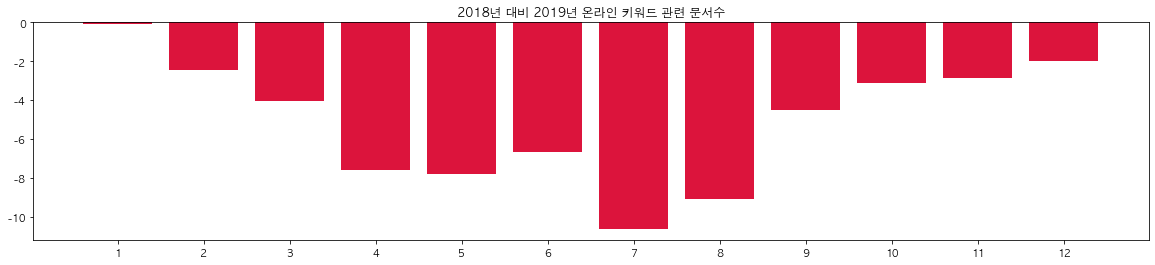

In [58]:
lst_2019 = df_diff[df_diff['year']==2019]['cnt'].tolist()
lst_2018 = df_diff[df_diff['year']==2018]['cnt'].tolist()
plt.bar(range(1,13),[lst_2019[i]-lst_2018[i] for i in range(len(lst_2019))], 
        color = ["royalblue" if i>0 else "crimson" for i in [lst_2019[i]-lst_2018[i] for i in range(len(lst_2019))]])
plt.xticks(np.arange(1,13))
plt.title('2018년 대비 2019년 온라인 키워드 관련 문서수')
plt.show()

<ipython-input-60-86e308aa7977>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['big_cat']=='식품'].groupby(['month','big_cat'])['qty','cnt'].mean().plot(kind = 'line')


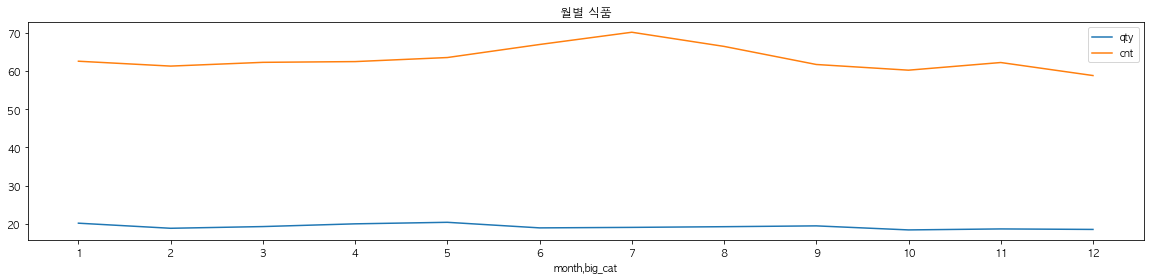

In [60]:
plt.rcParams["figure.figsize"] = (20,4)
data[data['big_cat']=='식품'].groupby(['month','big_cat'])['qty','cnt'].mean().plot(kind = 'line')
plt.xticks(np.arange(0,12), labels=np.arange(1,13))
plt.title('월별 식품')
plt.show()

<ipython-input-62-8a357ca4aaac>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['big_cat']=='식품'].groupby(['yymm','big_cat'])['qty','cnt'].mean().plot(kind = 'line')


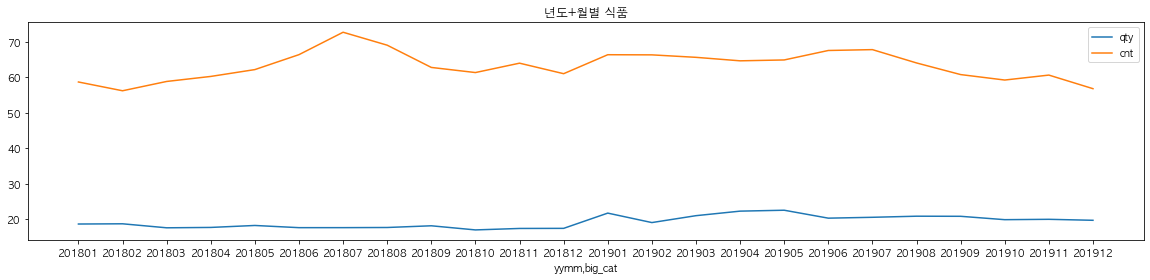

In [62]:
plt.rcParams["figure.figsize"] = (20,4)
data[data['big_cat']=='식품'].groupby(['yymm','big_cat'])['qty','cnt'].mean().plot(kind = 'line')
plt.xticks(np.arange(0,24), labels=['201801','201802','201803','201804','201805','201806','201807','201808','201809','201810','201811','201812',
                                    '201901','201902','201903','201904','201905','201906','201907','201908','201909','201910','201911','201912'])
plt.title('년도+월별 식품')
plt.show()

<ipython-input-63-2814e3ba97d9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_diff = data[data['big_cat']=='식품'].groupby(['year','month','big_cat'])['qty','cnt'].mean().reset_index()


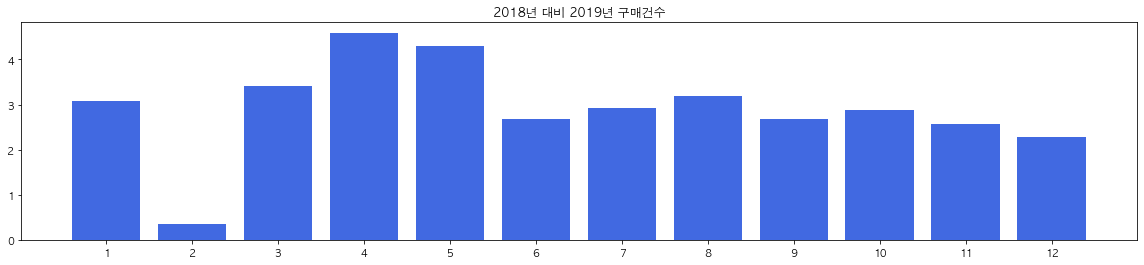

In [63]:
df_diff = data[data['big_cat']=='식품'].groupby(['year','month','big_cat'])['qty','cnt'].mean().reset_index()
lst_2019 = df_diff[df_diff['year']==2019]['qty'].tolist()
lst_2018 = df_diff[df_diff['year']==2018]['qty'].tolist()
plt.bar(range(1,13),[lst_2019[i]-lst_2018[i] for i in range(len(lst_2019))], 
        color = ["royalblue" if i>0 else "crimson" for i in [lst_2019[i]-lst_2018[i] for i in range(len(lst_2019))]])
plt.xticks(np.arange(1,13))
plt.title('2018년 대비 2019년 구매건수')
plt.show()

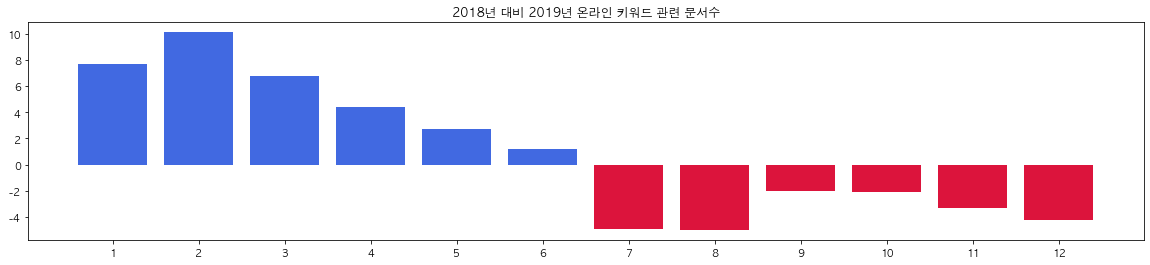

In [64]:
lst_2019 = df_diff[df_diff['year']==2019]['cnt'].tolist()
lst_2018 = df_diff[df_diff['year']==2018]['cnt'].tolist()
plt.bar(range(1,13),[lst_2019[i]-lst_2018[i] for i in range(len(lst_2019))], 
        color = ["royalblue" if i>0 else "crimson" for i in [lst_2019[i]-lst_2018[i] for i in range(len(lst_2019))]])
plt.xticks(np.arange(1,13))
plt.title('2018년 대비 2019년 온라인 키워드 관련 문서수')
plt.show()

<ipython-input-73-f57368386a29>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['sm_cat']=='공기청정기'].groupby(['yymm'])['qty','cnt'].mean().plot()


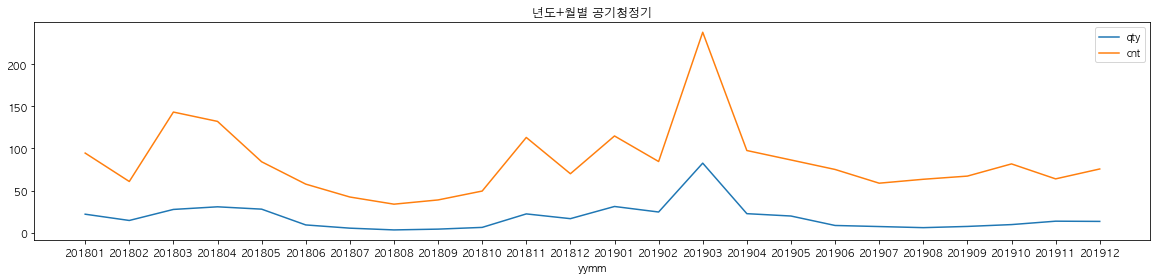

In [73]:
plt.rcParams["figure.figsize"] = (20,4)
data[data['sm_cat']=='공기청정기'].groupby(['yymm'])['qty','cnt'].mean().plot()
plt.xticks(np.arange(0,24), labels=['201801','201802','201803','201804','201805','201806','201807','201808','201809','201810','201811','201812',
                                    '201901','201902','201903','201904','201905','201906','201907','201908','201909','201910','201911','201912'])
plt.title('년도+월별 공기청정기')
plt.show()

<ipython-input-77-2d751e5f2687>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['sm_cat']=='공기정화 용품'].groupby(['yymm'])['qty','cnt'].mean().plot()


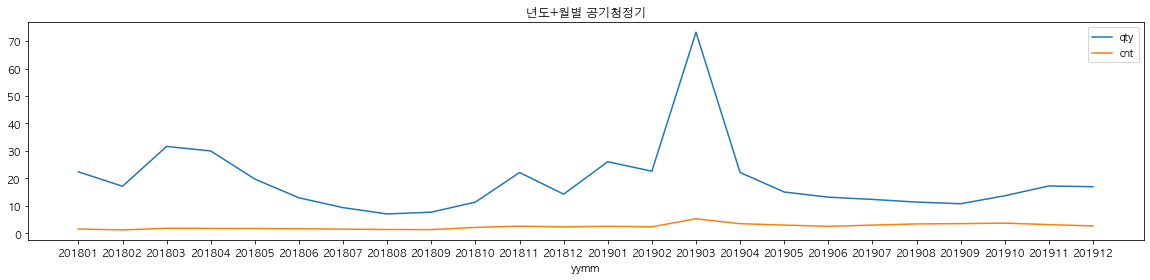

In [77]:
plt.rcParams["figure.figsize"] = (20,4)
data[data['sm_cat']=='공기정화 용품'].groupby(['yymm'])['qty','cnt'].mean().plot()
plt.xticks(np.arange(0,24), labels=['201801','201802','201803','201804','201805','201806','201807','201808','201809','201810','201811','201812',
                                    '201901','201902','201903','201904','201905','201906','201907','201908','201909','201910','201911','201912'])
plt.title('년도+월별 공기청정기')
plt.show()

<ipython-input-82-60b9216e7938>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['sm_cat']=='기초 화장용 크림'].groupby(['yymm'])['qty','cnt'].mean().plot()


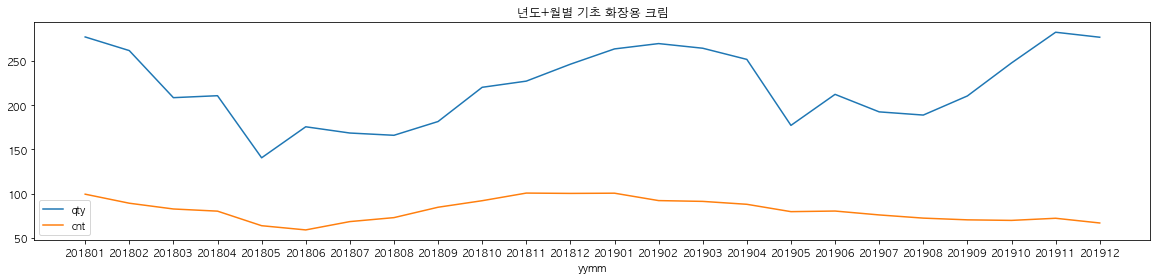

In [82]:
plt.rcParams["figure.figsize"] = (20,4)
data[data['sm_cat']=='기초 화장용 크림'].groupby(['yymm'])['qty','cnt'].mean().plot()
plt.xticks(np.arange(0,24), labels=['201801','201802','201803','201804','201805','201806','201807','201808','201809','201810','201811','201812',
                                    '201901','201902','201903','201904','201905','201906','201907','201908','201909','201910','201911','201912'])
plt.title('년도+월별 기초 화장용 크림')
plt.show()

<ipython-input-94-f0ca79272a3d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['sm_cat']=='기초 화장용 에센스'].groupby(['yymm'])['qty','cnt'].mean().plot()


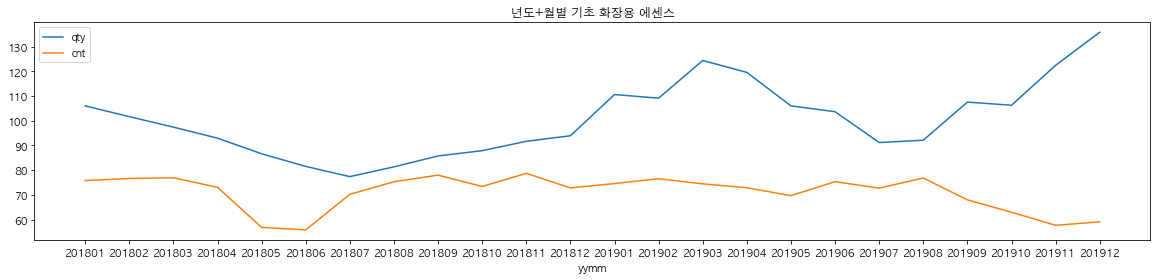

In [94]:
plt.rcParams["figure.figsize"] = (20,4)
data[data['sm_cat']=='기초 화장용 에센스'].groupby(['yymm'])['qty','cnt'].mean().plot()
plt.xticks(np.arange(0,24), labels=['201801','201802','201803','201804','201805','201806','201807','201808','201809','201810','201811','201812',
                                    '201901','201902','201903','201904','201905','201906','201907','201908','201909','201910','201911','201912'])
plt.title('년도+월별 기초 화장용 에센스')
plt.show()

<ipython-input-93-1697854bd81b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['sm_cat']=='샴푸'].groupby(['yymm'])['qty','cnt'].mean().plot()


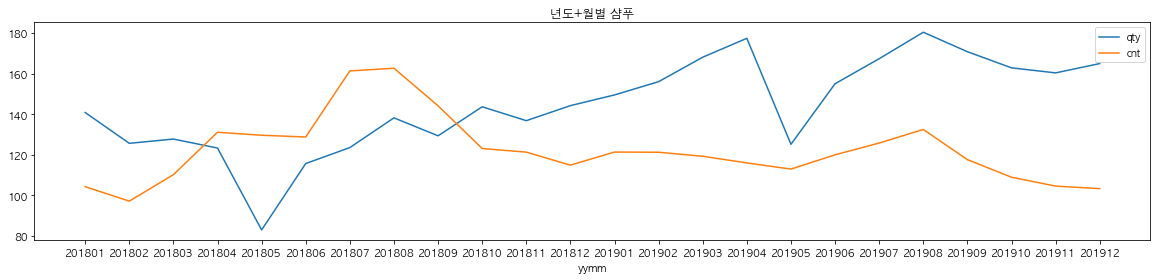

In [93]:
plt.rcParams["figure.figsize"] = (20,4)
data[data['sm_cat']=='샴푸'].groupby(['yymm'])['qty','cnt'].mean().plot()
plt.xticks(np.arange(0,24), labels=['201801','201802','201803','201804','201805','201806','201807','201808','201809','201810','201811','201812',
                                    '201901','201902','201903','201904','201905','201906','201907','201908','201909','201910','201911','201912'])
plt.title('년도+월별 샴푸')
plt.show()

<ipython-input-96-063154e1bc99>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['sm_cat']=='생수'].groupby(['yymm'])['qty','cnt'].mean().plot()


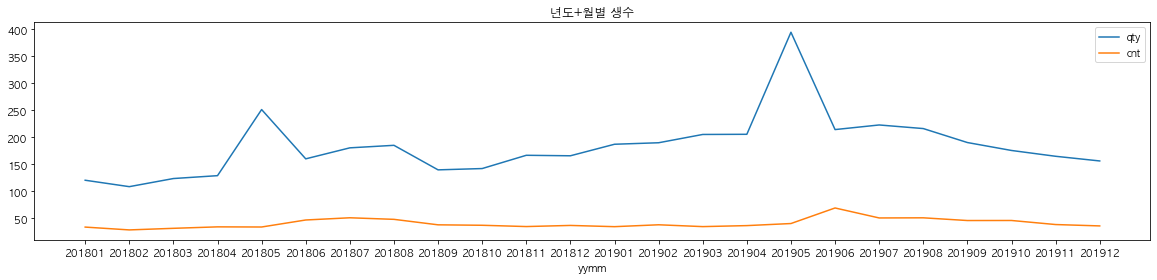

In [96]:
plt.rcParams["figure.figsize"] = (20,4)
data[data['sm_cat']=='생수'].groupby(['yymm'])['qty','cnt'].mean().plot()
plt.xticks(np.arange(0,24), labels=['201801','201802','201803','201804','201805','201806','201807','201808','201809','201810','201811','201812',
                                    '201901','201902','201903','201904','201905','201906','201907','201908','201909','201910','201911','201912'])
plt.title('년도+월별 생수')
plt.show()

<ipython-input-98-d44116f61dfe>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['sm_cat']=='커피음료'].groupby(['yymm'])['qty','cnt'].mean().plot()


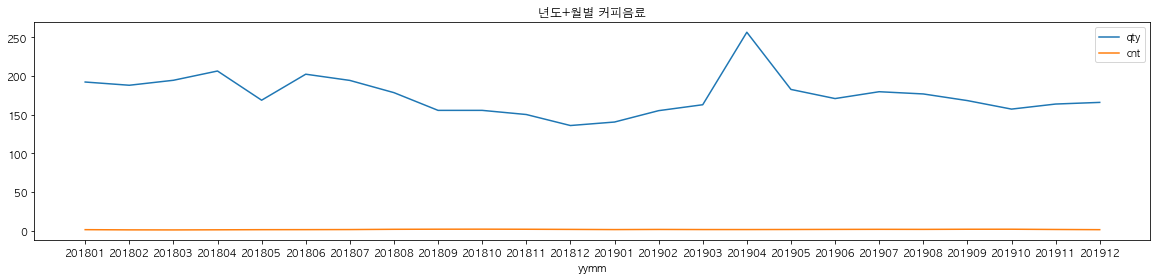

In [98]:
plt.rcParams["figure.figsize"] = (20,4)
data[data['sm_cat']=='커피음료'].groupby(['yymm'])['qty','cnt'].mean().plot()
plt.xticks(np.arange(0,24), labels=['201801','201802','201803','201804','201805','201806','201807','201808','201809','201810','201811','201812',
                                    '201901','201902','201903','201904','201905','201906','201907','201908','201909','201910','201911','201912'])
plt.title('년도+월별 커피음료')
plt.show()

* 생수, 커피음료: 스테디셀러는 검색량과 관계 없음

### 2-3. 성연령별

<ipython-input-105-7a8169fa9425>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['big_cat']=='냉난방가전'].groupby(['sex','age'])['qty','cnt'].mean().plot(kind = 'bar')


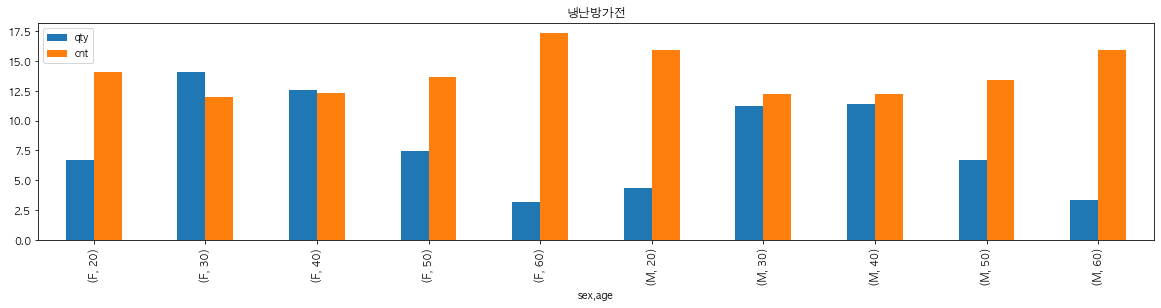

In [105]:
plt.rcParams["figure.figsize"] = (20,4)
data[data['big_cat']=='냉난방가전'].groupby(['sex','age'])['qty','cnt'].mean().plot(kind = 'bar')
plt.title('냉난방가전')
plt.show()

<ipython-input-106-7807dda321cb>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['big_cat']=='뷰티'].groupby(['sex','age'])['qty','cnt'].mean().plot(kind = 'bar')


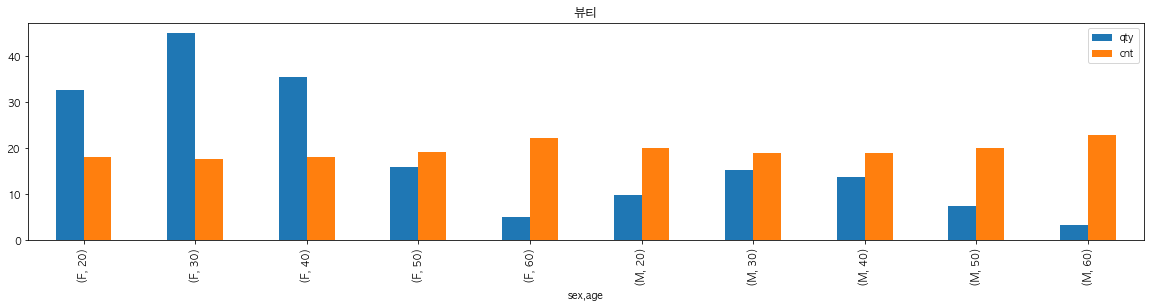

In [106]:
plt.rcParams["figure.figsize"] = (20,4)
data[data['big_cat']=='뷰티'].groupby(['sex','age'])['qty','cnt'].mean().plot(kind = 'bar')
plt.title('뷰티')
plt.show()

<ipython-input-107-cc25d4996879>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['big_cat']=='식품'].groupby(['sex','age'])['qty','cnt'].mean().plot(kind = 'bar')


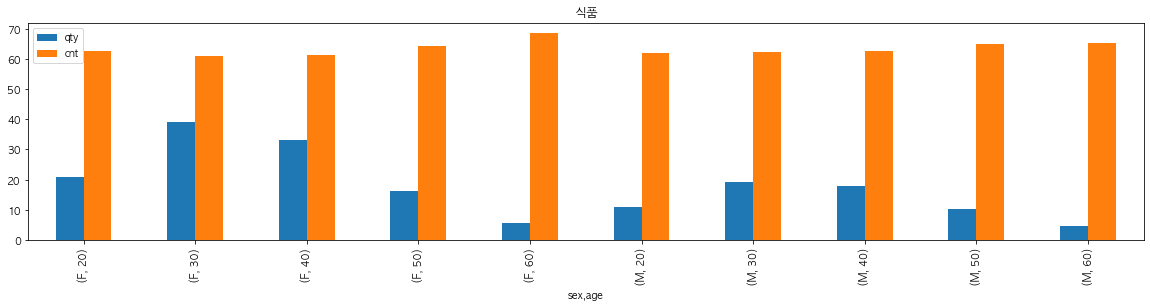

In [107]:
plt.rcParams["figure.figsize"] = (20,4)
data[data['big_cat']=='식품'].groupby(['sex','age'])['qty','cnt'].mean().plot(kind = 'bar')
plt.title('식품')
plt.show()